In [57]:
import numpy as np
import pandas as pd

In [58]:
df = pd.read_csv("Cleaned_review.csv")
X_train = df.values[: , 0]
Y_train = df.values[:,1]

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize


In [60]:
def my_tokenizer(s):
    s = word_tokenize(s)
    return s

In [61]:
tfidf = TfidfVectorizer(tokenizer=my_tokenizer, ngram_range=(1,2),max_features=1000)
vc_tfidf = tfidf.fit_transform(X_train).toarray()

### Prepare Testing Data

In [63]:
df = pd.read_csv("Cleaned_Testing_Data.csv")

In [64]:
X_test = df.values[:,0]

In [65]:
X_test = tfidf.transform(X_test).toarray()

In [66]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [67]:
vc_tfidf.shape

(40000, 1000)

In [68]:
Y_train = np.array(Y_train , dtype = 'int')

In [69]:
mnb = MultinomialNB()
mnb.fit(vc_tfidf,Y_train)
prediction_mnb = mnb.predict(X_test )

In [70]:
gnb = GaussianNB()
gnb.fit(vc_tfidf,Y_train)
prediction_gnb = gnb.predict(X_test )

In [71]:
bnb = BernoulliNB()
bnb.fit(vc_tfidf,Y_train)
prediction_bnb = bnb.predict(X_test )

In [72]:
def accuracy(a , b):
    c = 0 
    for i in range(a.shape[0]):
        if a[i] == b[i]:
            c+=1
    return c/a.shape[0]

In [73]:
accuracy(prediction_bnb , prediction_gnb)

0.879

In [74]:
accuracy(prediction_mnb , prediction_gnb)

0.9239

In [76]:
accuracy(prediction_bnb , prediction_mnb)

0.9393

In [79]:
mnb.score(vc_tfidf , Y_train)

0.84065

In [80]:
gnb.score(vc_tfidf , Y_train)

0.8195

In [81]:
bnb.score(vc_tfidf , Y_train)

0.8385

In [82]:
from sklearn.metrics import confusion_matrix

In [90]:
cnf_mat = confusion_matrix(Y_train , mnb.predict(vc_tfidf))

In [101]:
print(cnf_mat)

[[16364  3625]
 [ 2749 17262]]


In [103]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[16364  3625]
 [ 2749 17262]]


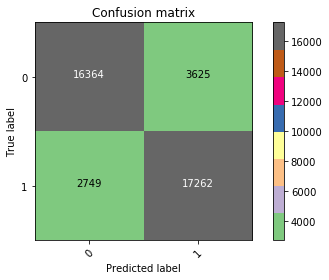

In [107]:
plot_confusion_matrix(cnf_mat , [0,1] , normalize=False , cmap = plt.cm.Accent )